In [8]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes_dataset.csv')
print(df.columns.tolist())

# Select features and target
df['Diabetes'] = (df['Fasting_Blood_Glucose'] >= 126).astype(int)
numerical_features = [
    'Age','BMI','Waist_Circumference','Fasting_Blood_Glucose','HbA1c',
    'Blood_Pressure_Systolic','Blood_Pressure_Diastolic','Cholesterol_Total',
    'Cholesterol_HDL','Cholesterol_LDL','GGT','Serum_Urate','Dietary_Intake_Calories',
    'Family_History_of_Diabetes','Previous_Gestational_Diabetes'
]
X = df[numerical_features]
y = df['Diabetes']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Cross-validation with Logistic Regression
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LogisticRegression(max_iter=1000, solver='lbfgs')
    model.fit(X_cv_train, y_cv_train)

    y_pred = model.predict(X_cv_val)
    cv_metrics['accuracy'].append(accuracy_score(y_cv_val, y_pred))
    cv_metrics['precision'].append(precision_score(y_cv_val, y_pred))
    cv_metrics['recall'].append(recall_score(y_cv_val, y_pred))
    cv_metrics['f1'].append(f1_score(y_cv_val, y_pred))

# Print average CV metrics
print("Cross-validation results:")
for metric in cv_metrics:
    print(f"{metric.capitalize()}: {np.mean(cv_metrics[metric]):.4f}")

# Final model on full training set
final_model = LogisticRegression(max_iter=1000, solver='lbfgs')
final_model.fit(X_train, y_train)

# Final test evaluation
y_test_pred = final_model.predict(X_test)
print("\nTest Set Evaluation:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_test_pred):.4f}")


Saving diabetes_dataset.csv to diabetes_dataset (5).csv
['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level', 'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status', 'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes']
Cross-validation results:
Accuracy: 0.9972
Precision: 0.9976
Recall: 0.9976
F1: 0.9976

Test Set Evaluation:
Accuracy:  0.9985
Precision: 0.9982
Recall:    0.9991
F1 Score:  0.9987


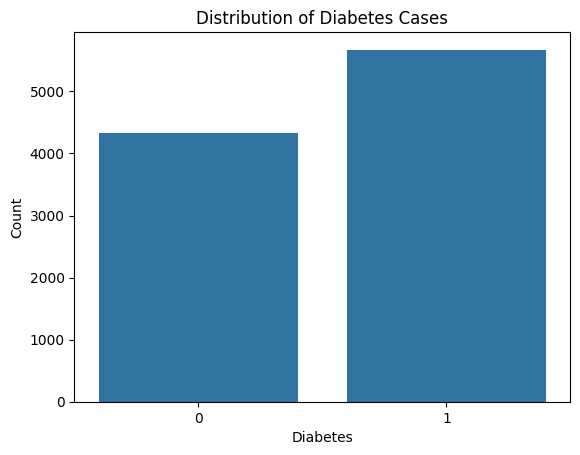

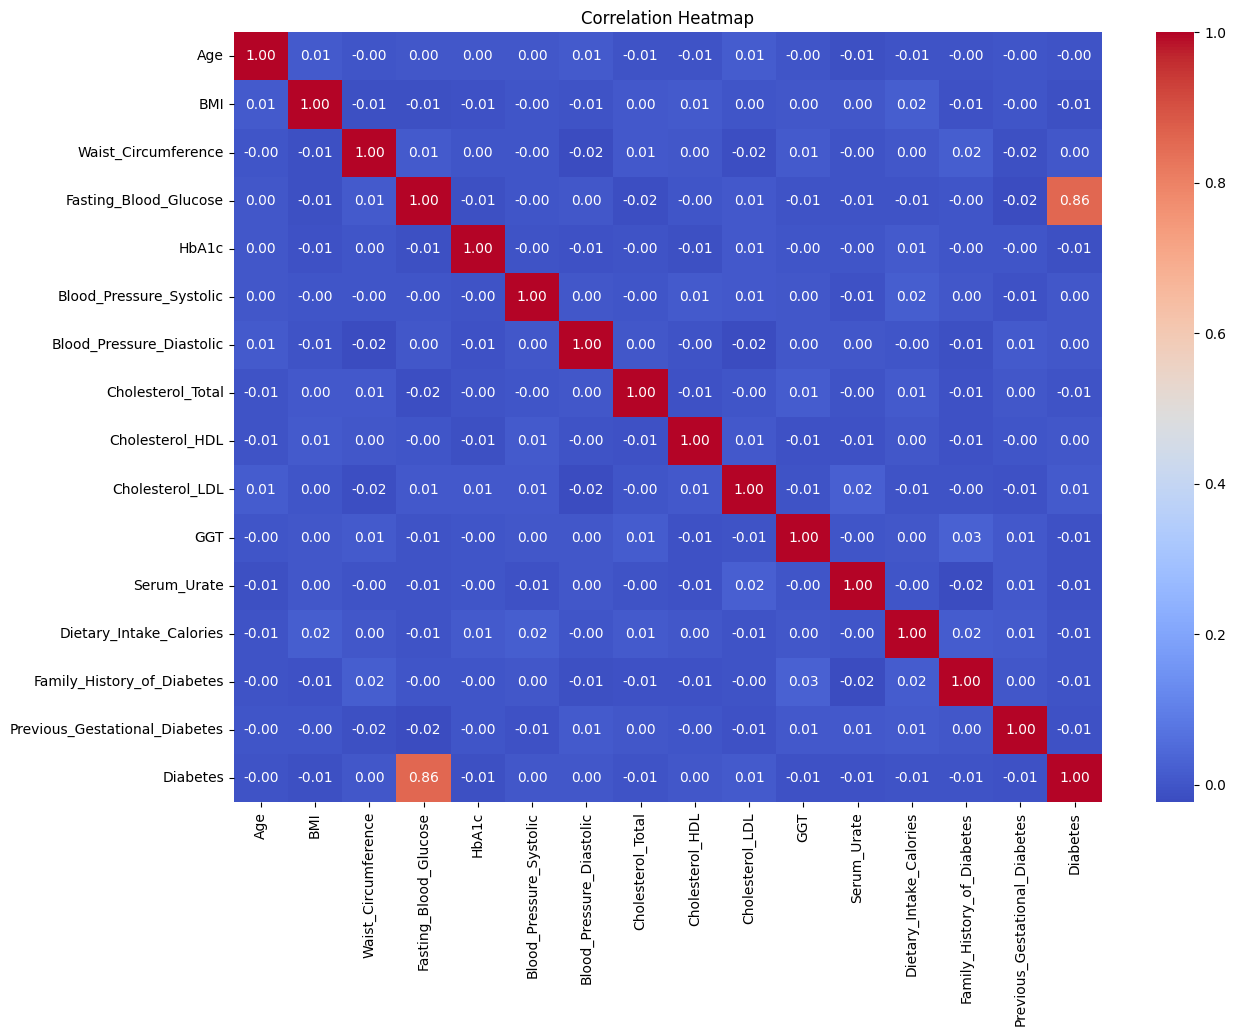

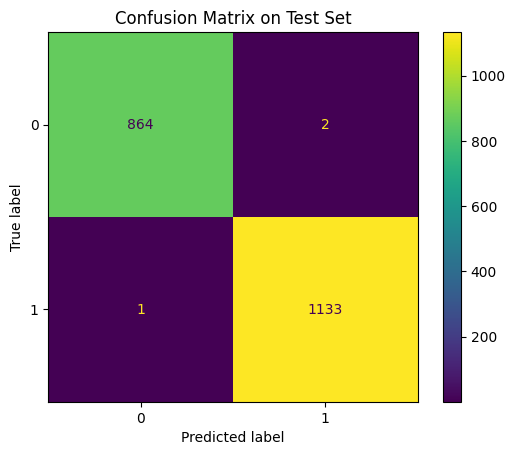

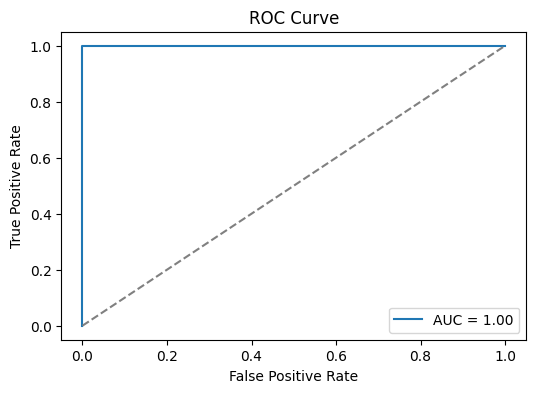

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Countplot of Diabetes cases
sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_features + ['Diabetes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Confusion Matrix for Logistic Regression
y_test_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix on Test Set')
plt.show()

# ROC Curve for Logistic Regression
y_probs = final_model.predict_proba(X_test)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
